# Measuring Stellar Mass for unWISE Images

In [7]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
homedir = os.getenv("HOME")
sys.path.append(homedir+"/github/APPSS/python/")

import image_functions as imfn

cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)

In [3]:
UNWISE_PIXSCALE = 2.75
LEGACY_PIXSCALE = 0.262

# Read in GBT Table

* Read in GBT catalog
* Select a galaxy
* get the Legacy and unWISE images

In [4]:
# APPSS catalogs from Catie

appscat_filename = homedir+"/research/APPSS/GBT22A-sample/gbt22a_430_sample_legacy.fits"
gbt = Table.read(appscat_filename)

# select first galaxy in the list as a test
ra = gbt['RA'][4]
dec = gbt['DEC'][4]
galname = f"AGC{gbt['name'][4]:06d}"
print(galname)

AGC005066


unwise images already downloaded
['AGC005066-unwise-1418p469-w1-img-m.fits', 'AGC005066-unwise-1418p469-w4-img-m.fits', 'AGC005066-unwise-1418p469-w3-img-m.fits', 'AGC005066-unwise-1418p469-w2-img-m.fits']
0 g
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-g.fits
return from get_legacy_images =  ('AGC005066-legacy-120-g.fits', 'AGC005066-legacy-120.jpg') g AGC005066
1 r
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-r.fits
return from get_legacy_images =  ('AGC005066-legacy-120-r.fits', 'AGC005066-legacy-120.jpg') r AGC005066
2 z
previously downloaded  AGC005066-legacy-120.jpg
previously downloaded  AGC005066-legacy-120-z.fits
return from get_legacy_images =  ('AGC005066-legacy-120-z.fits', 'AGC005066-legacy-120.jpg') z AGC005066


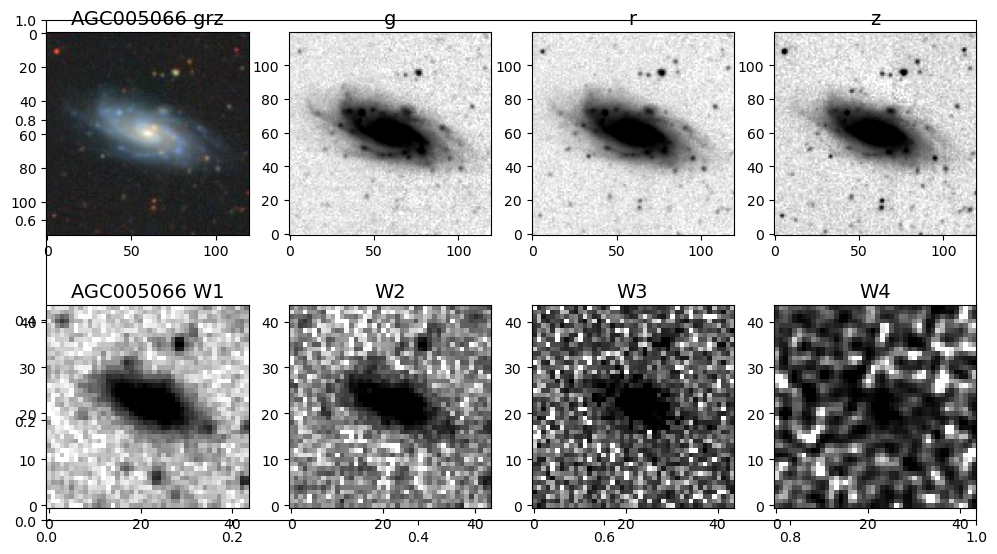

In [5]:
%run ~/github/APPSS/python/image_functions.py
%matplotlib inline
display_legacy_unwise(ra,dec,galname,imsize_arcsec=120)
plt.show()

In [8]:
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


In [10]:
plt.figure()
display_image(data)
plt.figure()

<Figure size 640x480 with 0 Axes>

# Trying my photwrapper program from halphagui

In [11]:
import sys
import os
%matplotlib inline
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/halphagui/')

In [12]:
import photwrapper

In [13]:
cwd = homedir+"/research/APPSS/mstar/"
os.chdir(cwd)
imname = "AGC005066-legacy-120-r.fits"
hdu = fits.open(imname)
data = hdu[0].data
hdu.close()


In [14]:
e = photwrapper.ellipse(imname)
e.detect_objects()

not using a mask


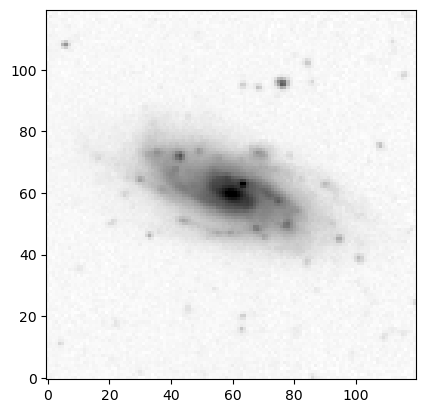

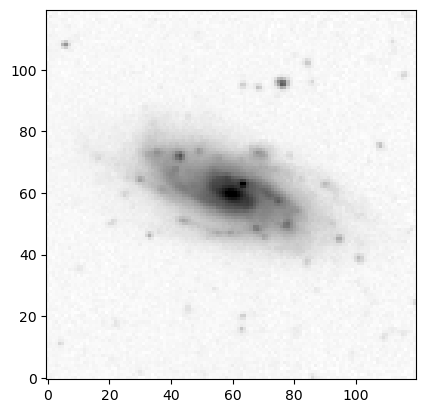

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

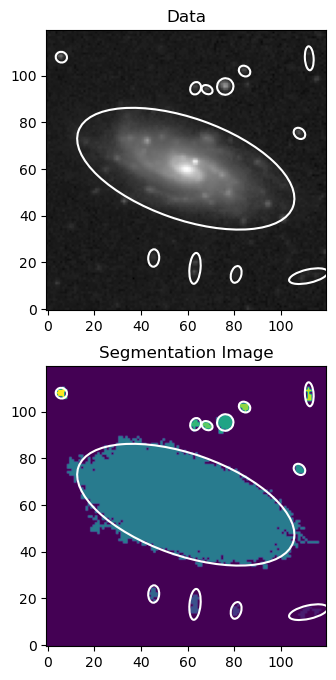

In [15]:
#just to check that object detection was ok
e.show_seg_aperture()
plt.show()

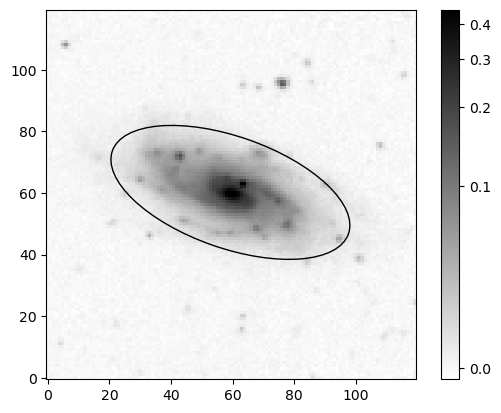

In [16]:
test = e.cat.to_table()
e.find_central_object()
e.get_ellipse_guess()
%matplotlib inline
e.draw_guess_ellipse_mpl()


Number of apertures = 80



<Figure size 640x480 with 0 Axes>

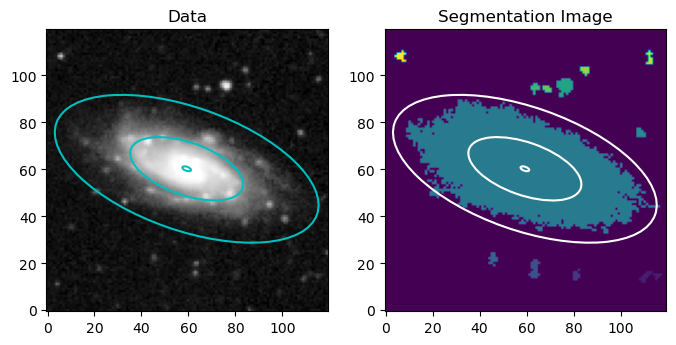

In [19]:
e.measure_phot()
%matplotlib inline
e.draw_phot_apertures()
plt.show()